In [151]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "15min-ETH-s0p67-20250727-KPA030_MT_STP_1K.csv"

data = pd.read_csv(file_path, header = 1)

In [154]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [156]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [157]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.


In [158]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [161]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

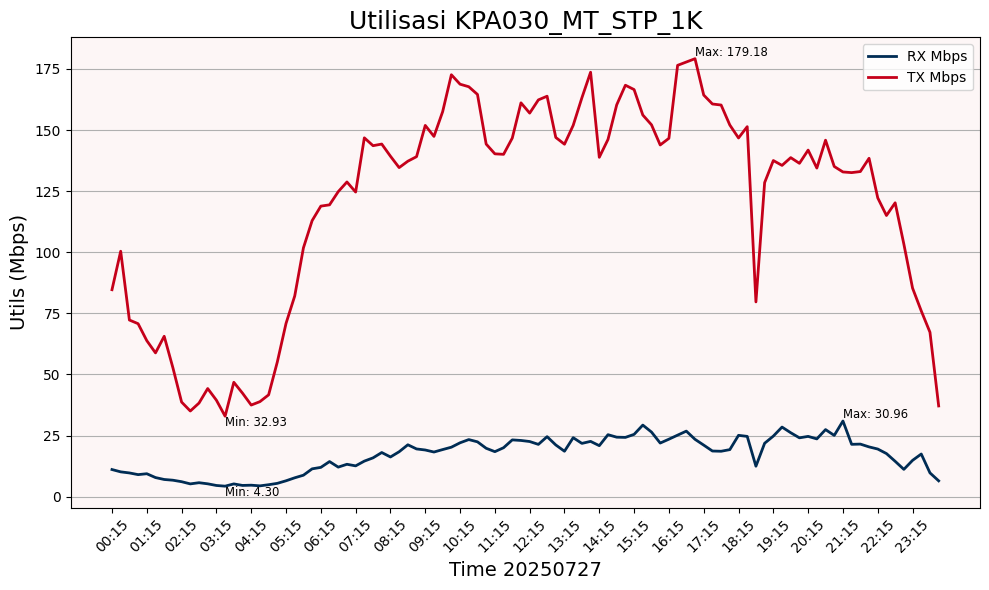

In [165]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('#FDF6F6')

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='#002C54', linestyle='-', linewidth=2)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='#C5001A', linestyle='-', linewidth=2)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
time_part = file_base.split('-')[3]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 18)
# plt.title(f"Utilisasi PNJ025_MT_SALOLOANG_1S", fontsize= 18)

# get_time = (pd.Timestamp.now() - pd.Timedelta(days=1)).strftime('%Y-%m-%d')
plt.xlabel(f'Time {time_part}', fontsize=14)
plt.ylabel('Utils (Mbps)', fontsize=14)

# Menambahkan legenda
plt.legend()

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()
max_tx = data['TX Mbps'].max()
min_tx = data['TX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]
highest_tx = data.loc[data['TX Mbps'] == max_tx]
lowest_tx = data.loc[data['TX Mbps'] == min_tx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Max: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Min: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='top')

for idx, row in highest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Max: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Min: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='top')

# Menambahkan margin +100 dari nilai maksimum data
# plt.ylim(0, max_rx * 1.2)
# plt.ylim(0, max_tx * 1.2)

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::4], rotation=45)
plt.tight_layout()
plt.show()